In [1]:
import sys

import random
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

sys.path.insert(0, './utilities/random_city.py')
from utilities.random_city import *
sys.path.insert(0, './utilities/simple_graph.py')
from utilities.simple_graph import *
sys.path.insert(0, './utilities/manoeuvre_graph.py')
from utilities.manoeuvre_graph import *

sys.path.insert(0, './utilities/inverted_graph.py')
from utilities.inverted_graph import *

In [2]:
random_city = get_random_city(
#     west_to_east=3,
#     south_to_north=2,
#     no_way_frequency=0,
#     one_way_forward_frequencey=0,
#     one_way_backward_frequencey=0,
#     two_way_frequency=1
    )

In [3]:
# plot_city(random_city)

In [4]:
manoeuvre_graph = get_manoeuvre_graph(random_city)

In [5]:
bad_nodes = get_manoeuvre_graph_statistics(manoeuvre_graph)

36 disconnected nodes
371 straight drives
142 right turns
155 left turns
184 u-turns
11 dead ends


36 disconnected nodes
371 straight drives
142 right turns
155 left turns
184 u-turns
11 dead ends


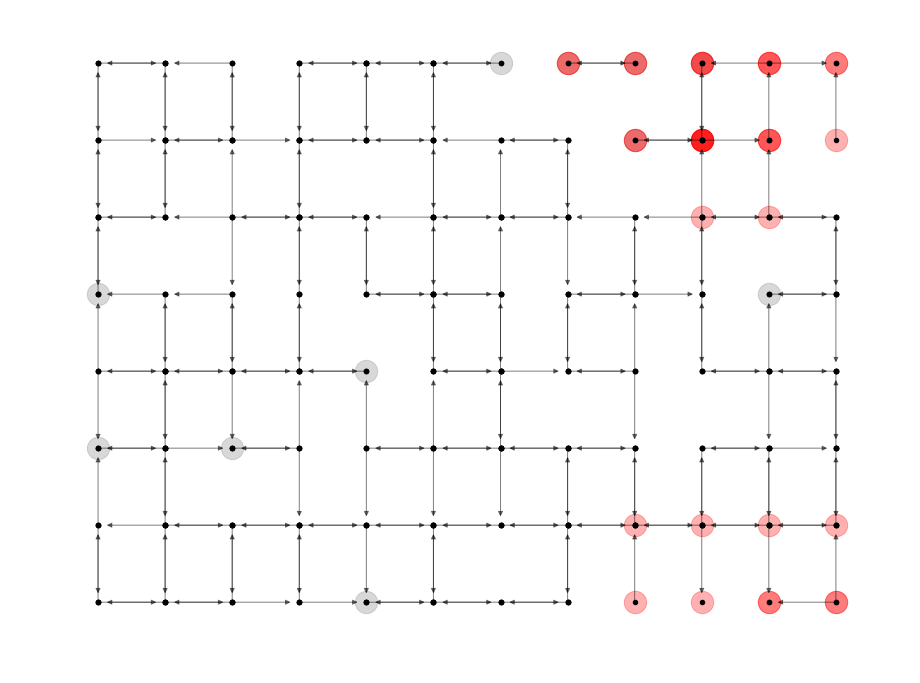

In [6]:
visualise_manoeuvre_graph(manoeuvre_graph)

(array([  9.,   0.,  48.,   0.,   0., 137.,   0., 192.,   0.,  84.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

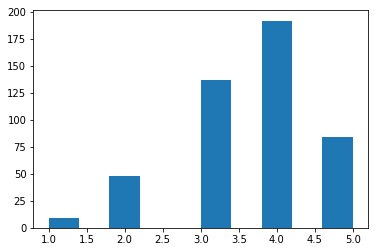

In [7]:
a = sorted([d for n, d in manoeuvre_graph.degree()], reverse=True)
plt.hist(a)

In [8]:
inverted_graph = get_inverted_graph(random_city)

16 disconnected nodes
136 straight drives
142 right turns
155 left turns
184 u-turns
3 dead ends


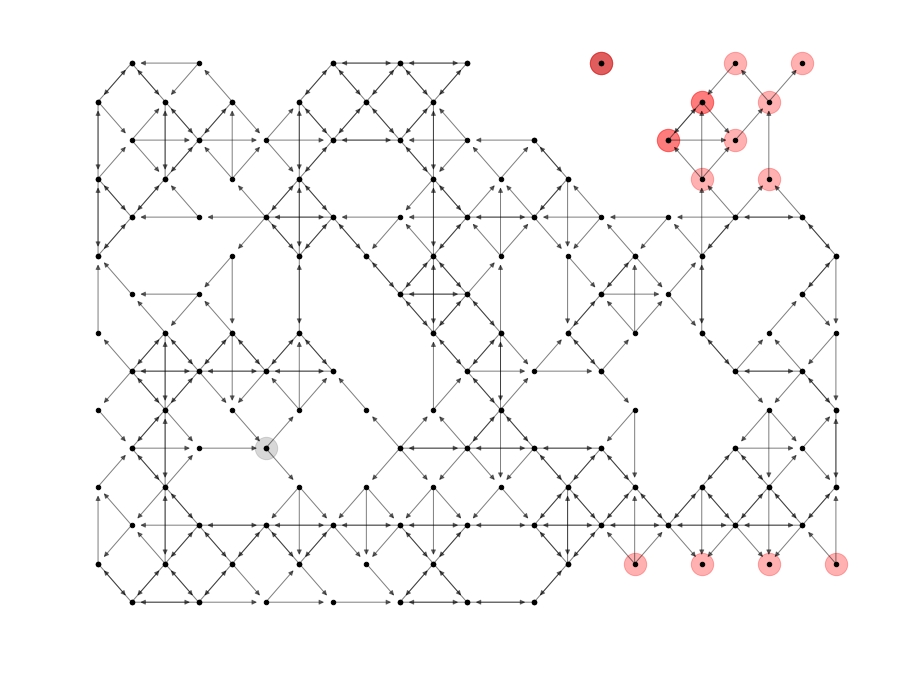

In [9]:
visualise_inverted_graph(inverted_graph)

In [10]:
for n in inverted_graph.nodes():
    print(inverted_graph.out_edges(n))

[(1, -1), (1, 17), (1, 18)]
[(-1, 1), (-1, 2)]
[(17, -17), (17, 33), (17, 34)]
[(18, 3), (18, -18), (18, 19), (18, 20)]
[(2, -2), (2, 4)]
[(-2, 1), (-2, 2)]
[(4, 5)]
[(3, -2), (3, 4)]
[(5, -5), (5, -20), (5, 21), (5, 22)]
[(-5, 5)]
[(-20, 3), (-20, -18), (-20, 19), (-20, 20)]
[(21, 37)]
[(22, -7), (22, -22), (22, 23), (22, 24)]
[(6, 5)]
[(7, -7), (7, -22), (7, 23), (7, 24)]
[(-7, 6), (-7, 7), (-7, 8)]
[(-22, -5), (-22, -20), (-22, 21), (-22, 22)]
[(23, -23), (23, 38), (23, 39), (23, 40)]
[(24, 9), (24, -24)]
[(8, 10)]
[(10, -10), (10, 11), (10, 12)]
[(9, 10)]
[(-10, 10)]
[(11, -11), (11, 28)]
[(12, -12), (12, 13), (12, 14)]
[(-11, -10), (-11, 11), (-11, 12)]
[(28, -28), (28, 29), (28, 30)]
[(-12, -10), (-12, 11), (-12, 12)]
[(13, -28), (13, 29), (13, 30)]
[(14, -14), (14, 15)]
[(-28, -11), (-28, 28)]
[(29, -29), (29, 45), (29, 46)]
[(30, -15), (30, -30)]
[(-14, -12), (-14, 13), (-14, 14)]
[(15, -15), (15, -30)]
[(-15, -14), (-15, 15)]
[(-30, -28), (-30, 29), (-30, 30)]
[(-17, -1), (-17

In [11]:
nx.is_strongly_connected(inverted_graph)

False

In [12]:
def prune_u_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'make_u_turn':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)
                
def prune_left_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'turn_left':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)

In [13]:
prune_u_turns(inverted_graph)
prune_left_turns(inverted_graph)

16 disconnected nodes
136 straight drives
142 right turns
155 left turns
184 u-turns
3 dead ends


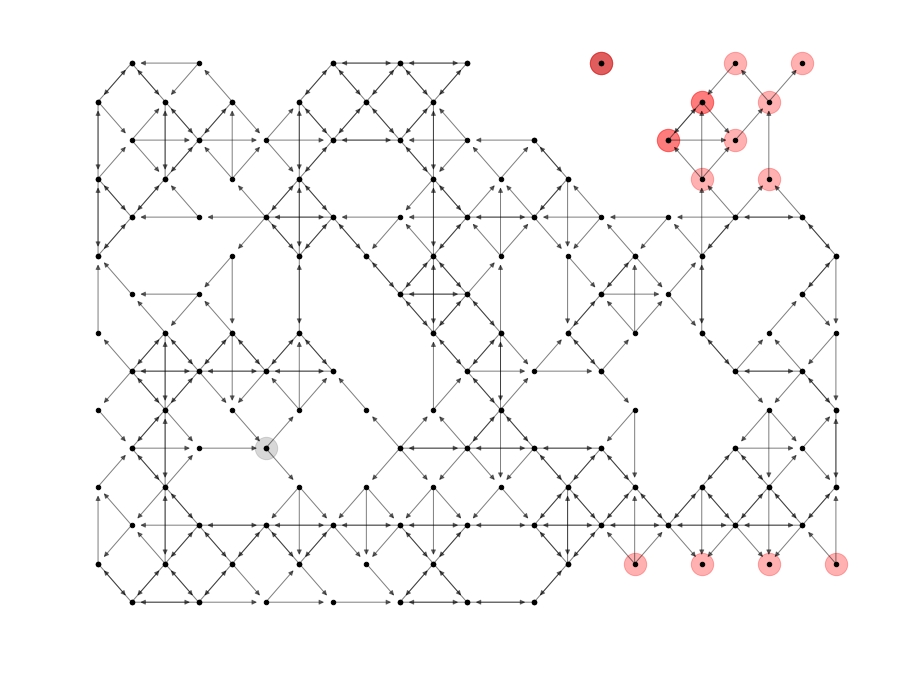

In [14]:
visualise_inverted_graph(inverted_graph)